# Michelin Rated Restaurants in France - Visualisation

In [1]:
# Module import
import pandas as pd
import geopandas as gpd

In [2]:
# Function import
from Functions.functions_visualisation import *

Importing the processed data

In [3]:
# All restaurants
all_france = pd.read_csv("../../data/France/all_restaurants(arrondissements).csv")
dataframe_info(all_france)

Unique Regions: 13
Unique Departments: 92
Unique Arrondissements: 242
Unique Locations: 658

Shape: (1033, 15)


name                    address  \
0  La Vague d'Or - Cheval Blanc St-Tropez  Plage de la Bouillabaisse   
1                 René et Maxime Meilleur    Hameau de  Saint-Marcel   
2                                     Kei         5 rue du Coq-Héron   

                            location arrondissement department_num department  \
0                Saint-Tropez, 83990     Draguignan             83        Var   
1  Saint-Martin-de-Belleville, 73440    Albertville             73     Savoie   
2                       Paris, 75001   1st (Louvre)             75      Paris   

    capital                      region price                     cuisine  \
0    Toulon  Provence-Alpes-Côte d'Azur  €€€€    Creative, Modern Cuisine   
1  Chambéry        Auvergne-Rhône-Alpes  €€€€  Creative, Regional Cuisine   
2     Paris               Île-de-France  €€€€    Modern Cuisine, Creative   

                                                url             award  stars  \
0  https://www.chevalblanc.com/fr/maison/st-tropez/  3 MICHELIN Stars    3.0   
1                    https://www.la-bouitte.com/fr/  3 MICHELIN Stars    3.0   
2                    https://www.restaurant-kei.fr/  3 MICHELIN Stars    3.0   

   longitude   latitude  
0   6.626154  43.266585  
1   6.513306  45.369046  
2   2.342285  48.864395

---

### `filter_dataframe` function

Defined in `functions.py`, the `filter_dataframe` function filters a dataframe based on specific regions and departments, either for inclusion or exclusion.

**Arguments**:

- `data` (pandas.DataFrame): The primary dataframe to filter.
- `regions` (list[str]/str, optional): Targeted region(s) to include.
- `departments` (list[str]/str, optional): Targeted department(s) to include.
- `exclude_regions` (list[str]/str, optional): Region(s) to exclude.
- `exclude_departments` (list[str]/str, optional): Department(s) to exclude.

**Returns**:

- pandas.DataFrame: The dataframe after applying filters.

##### Usage:

To include or exclude specific regions or departments, provide lists or single strings to the appropriate parameters. For example:

- For specific regions: `regions=['Region1', 'Region2']`
- To exclude departments: `exclude_departments='DepartmentX'`

The function ensures consistent filtering even with minor discrepancies in naming, thanks to the `_get_best_match` helper function.

---

In [4]:
# We define Paris, 75
paris = filter_dataframe(all_france, departments='Paris')
dataframe_info(paris)

Unique Regions: 1
Unique Departments: 1
Unique Arrondissements: 20
Unique Locations: 21

Shape: (159, 15)


name                                       address  \
2              Kei                            5 rue du Coq-Héron   
11  Le Pré Catelan          Route de Suresnes - bois de Boulogne   
13         Épicure  Le Bristol, 112 rue du Faubourg-Saint-Honoré   

        location arrondissement department_num department capital  \
2   Paris, 75001   1st (Louvre)             75      Paris   Paris   
11  Paris, 75016   16th (Passy)             75      Paris   Paris   
13  Paris, 75008   8th (Élysée)             75      Paris   Paris   

           region price                          cuisine  \
2   Île-de-France  €€€€         Modern Cuisine, Creative   
11  Île-de-France  €€€€  Modern Cuisine, Classic Cuisine   
13  Île-de-France  €€€€                   Modern Cuisine   

                                                  url             award  \
2                      https://www.restaurant-kei.fr/  3 MICHELIN Stars   
11                      https://www.leprecatelan.com/  3 MICHELIN Stars   
13  https://www.oetkercollection.com/fr/hotels/le-...  3 MICHELIN Stars   

    stars  longitude   latitude  
2     3.0   2.342285  48.864395  
11    3.0   2.250718  48.863937  
13    3.0   2.314625  48.871762

We can be somewhat imprecise with spelling

In [5]:
# Exclude Île-de-France
rest_of_france = filter_dataframe(all_france, exclude_regions='ile de france')
dataframe_info(rest_of_france)

Unique Regions: 12
Unique Departments: 84
Unique Arrondissements: 208
Unique Locations: 618

Shape: (853, 15)


name                    address  \
0  La Vague d'Or - Cheval Blanc St-Tropez  Plage de la Bouillabaisse   
1                 René et Maxime Meilleur    Hameau de  Saint-Marcel   
3                  Auberge du Vieux Puits      5 avenue Saint-Victor   

                            location arrondissement department_num department  \
0                Saint-Tropez, 83990     Draguignan             83        Var   
1  Saint-Martin-de-Belleville, 73440    Albertville             73     Savoie   
3                Fontjoncouse, 11360       Narbonne             11       Aude   

       capital                      region price                     cuisine  \
0       Toulon  Provence-Alpes-Côte d'Azur  €€€€    Creative, Modern Cuisine   
1     Chambéry        Auvergne-Rhône-Alpes  €€€€  Creative, Regional Cuisine   
3  Carcassonne                   Occitanie  €€€€                    Creative   

                                                url             award  stars  \
0  https://www.chevalblanc.com/fr/maison/st-tropez/  3 MICHELIN Stars    3.0   
1                    https://www.la-bouitte.com/fr/  3 MICHELIN Stars    3.0   
3            https://www.aubergeduvieuxpuits.fr/fr/  3 MICHELIN Stars    3.0   

   longitude   latitude  
0   6.626154  43.266585  
1   6.513306  45.369046  
3   2.789329  43.048173

In [7]:
# Define 'South of France'
south = filter_dataframe(all_france, regions=['Provence', 'aquitaine', 'occitanie', 'auvergne rhone alpes'])
dataframe_info(south)

Unique Regions: 4
Unique Departments: 41
Unique Arrondissements: 99
Unique Locations: 333

Shape: (486, 15)


name                    address  \
0  La Vague d'Or - Cheval Blanc St-Tropez  Plage de la Bouillabaisse   
1                 René et Maxime Meilleur    Hameau de  Saint-Marcel   
3                  Auberge du Vieux Puits      5 avenue Saint-Victor   

                            location arrondissement department_num department  \
0                Saint-Tropez, 83990     Draguignan             83        Var   
1  Saint-Martin-de-Belleville, 73440    Albertville             73     Savoie   
3                Fontjoncouse, 11360       Narbonne             11       Aude   

       capital                      region price                     cuisine  \
0       Toulon  Provence-Alpes-Côte d'Azur  €€€€    Creative, Modern Cuisine   
1     Chambéry        Auvergne-Rhône-Alpes  €€€€  Creative, Regional Cuisine   
3  Carcassonne                   Occitanie  €€€€                    Creative   

                                                url             award  stars  \
0  https://www.chevalblanc.com/fr/maison/st-tropez/  3 MICHELIN Stars    3.0   
1                    https://www.la-bouitte.com/fr/  3 MICHELIN Stars    3.0   
3            https://www.aubergeduvieuxpuits.fr/fr/  3 MICHELIN Stars    3.0   

   longitude   latitude  
0   6.626154  43.266585  
1   6.513306  45.369046  
3   2.789329  43.048173

----
&nbsp;
## Michelin Stars by arrondissement, department and region

### `top_restaurants` function

Lists areas with the highest count of Michelin-starred restaurants based on a specified granularity.

**Arguments**:

- `data` (pandas.DataFrame): Contains restaurant details.
- `granularity` (str): Specifies granularity: 'region', 'department', or 'arrondissement'.
- `star_rating` (int): Michelin star rating (1, 2, or 3).
- `top_n` (int): Number of top areas to display.
- `display_restaurants` (bool, default=True): If True, shows names and locations of restaurants.
- `display_info` (bool, default=False): If True, provides additional details for each restaurant.

**Behavior**:

1. **Ranking**: Lists top areas based on count of Michelin-starred restaurants.
2. **Restaurant Details**: If `display_restaurants` is True, lists restaurants in each area. Additional details shown if `display_info` is True.

#### By Region

In [8]:
top_restaurants(rest_of_france, granularity='region', star_rating=3, top_n=3, display_info=True)

Top 3 regions with most ⭐⭐⭐ restaurants:

Region: Auvergne-Rhône-Alpes
8 ⭐⭐⭐ Restaurants

Restaurant: Georges Blanc
Location: Vonnas, 01540
Style of Cuisine: Classic Cuisine
URL: https://www.georgesblanc.com/fr/

Restaurant: René et Maxime Meilleur
Location: Saint-Martin-de-Belleville, 73440
Style of Cuisine: Creative, Regional Cuisine
URL: https://www.la-bouitte.com/fr/

Restaurant: Flocons de Sel
Location: Megève, 74120
Style of Cuisine: Modern Cuisine
URL: https://www.floconsdesel.com/fr/

Restaurant: Régis et Jacques Marcon
Location: Saint-Bonnet-le-Froid, 43290
Style of Cuisine: Creative
URL: https://www.lesmaisonsmarcon.fr/

Restaurant: Troisgros - Le Bois sans Feuilles
Location: Ouches, 42155
Style of Cuisine: Creative
URL: https://www.troisgros.com/

Restaurant: Le Clos des Sens
Location: Annecy, 74940
Style of Cuisine: Creative
URL: https://www.closdessens.com/

Restaurant: Pic
Location: Valence, 26000
Style of Cuisine: Creative
URL: http://www.anne-sophie-pic.com

Restaurant:

### By Department

In [10]:
top_restaurants(south, granularity='department', star_rating=2, top_n=3, display_info=True)

Top 3 departments with most ⭐⭐ restaurants:

Department: Gironde
5 ⭐⭐ Restaurants

Restaurant: La Grand'Vigne - Les Sources de Caudalie
Location: Martillac, 33650
Style of Cuisine: Modern Cuisine
URL: https://www.sources-caudalie.com/

Restaurant: Lalique
Location: Bommes, 33210
Style of Cuisine: Modern Cuisine
URL: https://www.lafauriepeyragueylalique.com/le-restaurant/

Restaurant: La Table de Pavie
Location: Saint-Emilion, 33330
Style of Cuisine: Modern Cuisine, Creative
URL: http://www.hoteldepavie.com

Restaurant: Le Skiff Club
Location: Pyla-sur-Mer, 33115
Style of Cuisine: Modern Cuisine
URL: http://www.haaitza.com

Restaurant: Le Pressoir d'Argent - Gordon Ramsay
Location: Bordeaux, 33000
Style of Cuisine: Modern Cuisine
URL: https://www.bordeaux.intercontinental.com/



Department: Alpes-Maritimes
4 ⭐⭐ Restaurants

Restaurant: La Villa Archange
Location: Le Cannet, 06110
Style of Cuisine: Modern Cuisine
URL: http://www.bruno-oger.com

Restaurant: La Chèvre d'Or
Location: Èze, 

### By *Arrondissement*

In [11]:
top_restaurants(south, granularity='arrondissement', star_rating=2, top_n=3, display_info=True)

Top 3 arrondissements with most ⭐⭐ restaurants:

Arrondissement: Lyon
4 ⭐⭐ Restaurants

Restaurant: Takao Takano
Location: Lyon, 69006
Style of Cuisine: Creative
URL: https://www.takaotakano.com/

Restaurant: Paul Bocuse
Location: Collonges-au-Mont-d'Or, 69660
Style of Cuisine: Classic Cuisine
URL: http://www.bocuse.fr

Restaurant: Le Neuvième Art
Location: Lyon, 69006
Style of Cuisine: Creative, Modern Cuisine
URL: http://www.leneuviemeart.com/fr

Restaurant: Mère Brazier
Location: Lyon, 69001
Style of Cuisine: Classic Cuisine
URL: http://www.lamerebrazier.fr



Arrondissement: Albertville
3 ⭐⭐ Restaurants

Restaurant: Le Sarkara
Location: Courchevel, 73120
Style of Cuisine: Creative
URL: https://www.lek2palace.com/fr/deguster/le-sarkara.html

Restaurant: Le Chabichou by Stéphane Buron
Location: Courchevel, 73120
Style of Cuisine: Modern Cuisine
URL: https://www.chabichou-courchevel.com/

Restaurant: Le Montgomerie
Location: Courchevel, 73120
Style of Cuisine: Creative
URL: https://ww

----
&nbsp;
## Plotting Geographical Data

In [15]:
# Load GeoJSON arrondissement data
arrondissements = gpd.read_file("../../data/France/arrondissement_restaurants.geojson")
dataframe_info(arrondissements)

GeoDataFrame.
Unique Regions: 13
Unique Departments: 96
Unique Arrondissements: 320

Shape: (320, 18)


code   arrondissement department_num department          capital  \
0  01001           Belley             01        Ain  Bourg-en-Bresse   
1  01002  Bourg-en-Bresse             01        Ain  Bourg-en-Bresse   
2  01003              Gex             01        Ain  Bourg-en-Bresse   

                 region  bib_gourmand  1_star  2_star  3_star  total_stars  \
0  Auvergne-Rhône-Alpes             0       1       0       0            1   
1  Auvergne-Rhône-Alpes             5       2       0       1            5   
2  Auvergne-Rhône-Alpes             0       1       0       0            1   

   starred_restaurants  municipal_population  \
0                    1                123405   
1                    3                340382   
2                    1                100314   

   population_density(inhabitants/sq_km)  poverty_rate(%)  \
0                                   77.9             10.2   
1                                  118.4              8.8   
2                                  247.8             12.4   

   average_net_hourly_wage(€)  \
0                       15.30   
1                       15.65   
2                       15.32   

                                           locations  \
0  {'1': [[46.0070045, 5.3605085]], '2': None, '3...   
1  {'1': [[46.4340961, 4.9390332], [46.2987913, 4...   
2  {'1': [[46.3626315, 6.0258533]], '2': None, '3...   

                                            geometry  
0  POLYGON ((5.12174 45.81118, 5.12665 45.81392, ...  
1  POLYGON ((4.98022 46.51520, 4.98355 46.51539, ...  
2  POLYGON ((6.06401 46.41623, 6.06730 46.41494, ...

In [16]:
# Load GeoJSON departmental data
departments = gpd.read_file("../../data/France/department_restaurants.geojson")
dataframe_info(departments)

GeoDataFrame.
Unique Regions: 13
Unique Departments: 96

Shape: (96, 20)


code department          capital                region  bib_gourmand  \
0   01        Ain  Bourg-en-Bresse  Auvergne-Rhône-Alpes             6   
1   02      Aisne             Laon       Hauts-de-France             0   
2   03     Allier          Moulins  Auvergne-Rhône-Alpes             4   

   1_star  2_star  3_star  total_stars  starred_restaurants  GDP_millions(€)  \
0       4       0       1            7                    5         16726.40   
1       0       0       0            0                    0         12016.40   
2       2       0       0            2                    2          8278.98   

   GDP_per_capita(€)  poverty_rate(%)  average_annual_unemployment_rate(%)  \
0           25425.63             10.5                                  5.5   
1           22699.26             18.0                                 10.5   
2           24667.13             15.3                                  7.7   

   average_net_hourly_wage(€)  municipal_population  \
0                       15.34              657856.0   
1                       13.92              529374.0   
2                       13.63              335628.0   

   population_density(inhabitants/sq_km)  area(sq_km)  \
0                                  114.2      5760.56   
1                                   71.9      7362.64   
2                                   45.7      7344.16   

                                           locations  \
0  {'1': [[46.3626315, 6.0258533], [46.0070045, 5...   
1                  {'1': None, '2': None, '3': None}   
2  {'1': [[46.1246273, 3.4192286], [46.3233297, 2...   

                                            geometry  
0  POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...  
1  POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...  
2  POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...

In [17]:
# Load GeoJSON regional data
regions = gpd.read_file("../../data/France/region_restaurants.geojson")
dataframe_info(regions)

GeoDataFrame.
Unique Regions: 13

Shape: (13, 17)


region  bib_gourmand  1_star  2_star  3_star  total_stars  \
0            Île-de-France            46     110      15       9          167   
1      Centre-Val de Loire            23      20       1       0           22   
2  Bourgogne-Franche-Comté            20      28       6       1           43   

   starred_restaurants  GDP_millions(€)  GDP_per_capita(€)  poverty_rate(%)  \
0                  134        700754.40       57102.849021        15.544561   
1                   21         72707.28       28237.339229        12.898109   
2                   35         76921.54       27455.358274        12.778156   

   average_annual_unemployment_rate(%)  average_net_hourly_wage(€)  \
0                             7.002391                   20.681268   
1                             6.796385                   14.801967   
2                             6.318556                   14.355314   

   municipal_population  population_density(inhabitants/sq_km)  area(sq_km)  \
0            12271794.0                                1021.62     12012.13   
1             2574863.0                                  65.76     39153.00   
2             2801695.0                                  58.65     47771.30   

                                           locations  \
0  {'1': [[48.8652933, 2.3421907], [48.8583566, 2...   
1  {'1': [[47.3602993, 1.7438252], [47.641088, 1....   
2  {'1': [[46.7127086, 4.6941996], [46.3034378, 4...   

                                            geometry  
0  POLYGON ((2.59052 49.07965, 2.63327 49.10838, ...  
1  POLYGON ((2.87463 47.52042, 2.88845 47.50943, ...  
2  POLYGON ((3.62942 46.74946, 3.57569 46.74952, ...

---

### `plot_choropleth` function

Displays a choropleth map from a provided dataset.

**Arguments**:

- `df` (GeoDataFrame): The DataFrame with geospatial data.
- `column` (str): Column to visualize.
- `title` (str): Map title.
- `granularity` (str): Geographical scale - 'region', 'department', or 'arrondissement'. Default is 'department'.
- `restaurants` (bool): Overlay restaurant locations. Default is False.
- `show_legend` (bool): Display legend. Default is True.
- `cmap` (str): Choropleth colormap. Default is 'Blues'.
- `figsize` (tuple): Map size. Default is (10, 10).

The function checks for column existence and numerical type. It can label regions, departments, or arrondissements based on granularity.

---

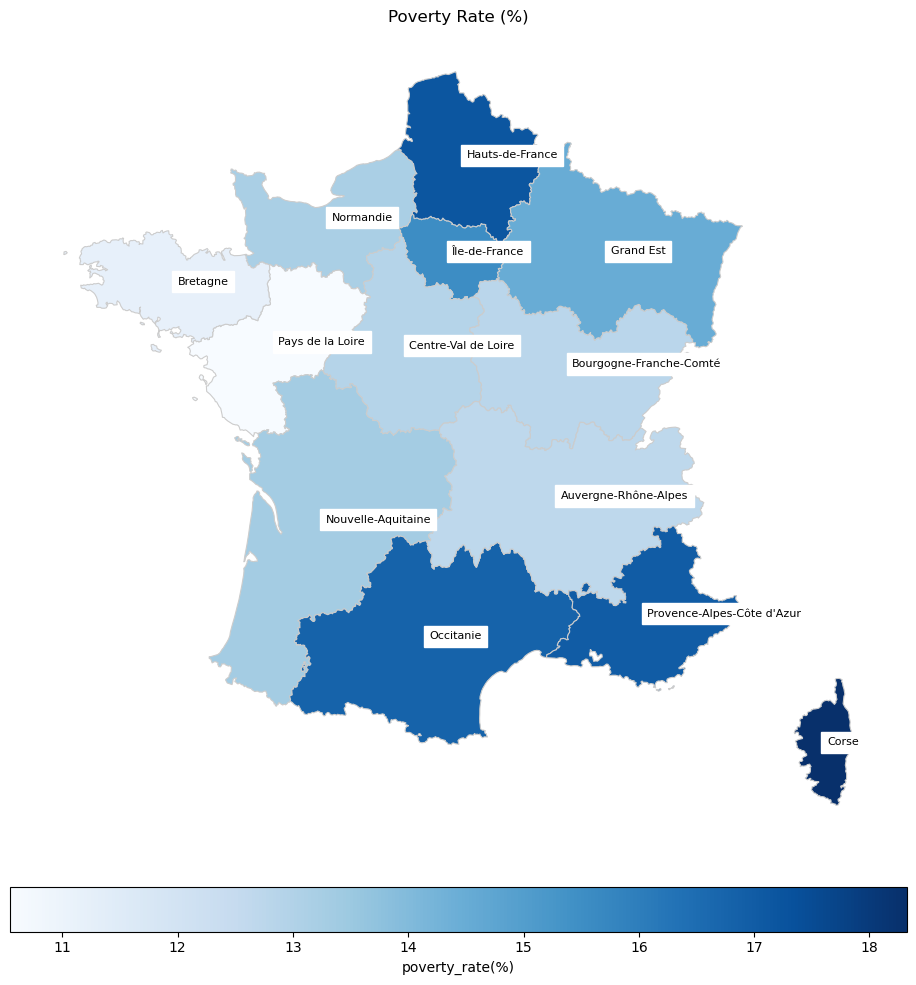

In [17]:
plot_choropleth(no_paris_dept, 'total_stars', "Michelin Stars by Department\n(Excluding Paris)")

In [17]:
plot_choropleth(no_paris_arr, 'total_stars', "Michelin Stars by Arrondissement\n(Excluding Paris)")

GeoDataFrame.
Unique Regions: 1
Unique Departments: 12

Shape: (12, 20)


code department          capital                region  bib_gourmand  \
0   01        Ain  Bourg-en-Bresse  Auvergne-Rhône-Alpes             6   
2   03     Allier          Moulins  Auvergne-Rhône-Alpes             4   
8   07    Ardèche           Privas  Auvergne-Rhône-Alpes             5   

   1_star  2_star  3_star  total_stars  starred_restaurants  GDP_millions(€)  \
0       4       0       1            7                    5         16726.40   
2       2       0       0            2                    2          8278.98   
8       3       0       0            3                    3          7319.02   

   GDP_per_capita(€)  poverty_rate(%)  average_annual_unemployment_rate(%)  \
0           25425.63             10.5                                  5.5   
2           24667.13             15.3                                  7.7   
8           22224.31             14.3                                  8.1   

   average_net_hourly_wage(€)  municipal_population  \
0                       15.34              657856.0   
2                       13.63              335628.0   
8                       14.14              329325.0   

   population_density(inhabitants/sq_km)  area(sq_km)  \
0                                  114.2      5760.56   
2                                   45.7      7344.16   
8                                   59.6      5525.59   

                                           locations  \
0  {'1': [[46.3626315, 6.0258533], [46.0070045, 5...   
2  {'1': [[46.1246273, 3.4192286], [46.3233297, 2...   
8  {'1': [[44.8614644, 4.8331975], [44.4040212, 4...   

                                            geometry  
0  POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...  
2  POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...  
8  POLYGON ((4.48313 45.23645, 4.48790 45.23218, ...

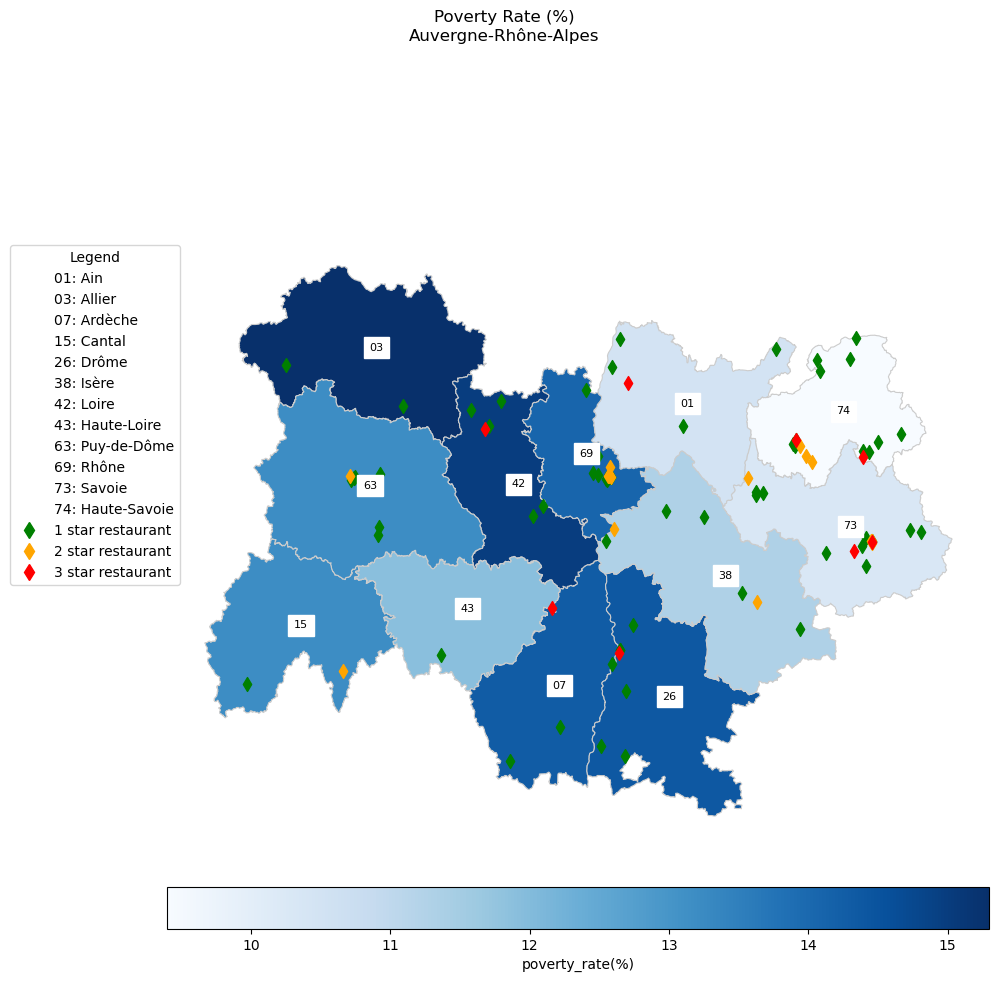

In [18]:
plot_choropleth(no_ile_france, 'GDP_per_capita(€)', "Per Capita GDP (€)\n(Excluding Île-de-France)")

### Plotting multiple maps on the same figure

Lists of `column` and `title` are passed as arguments

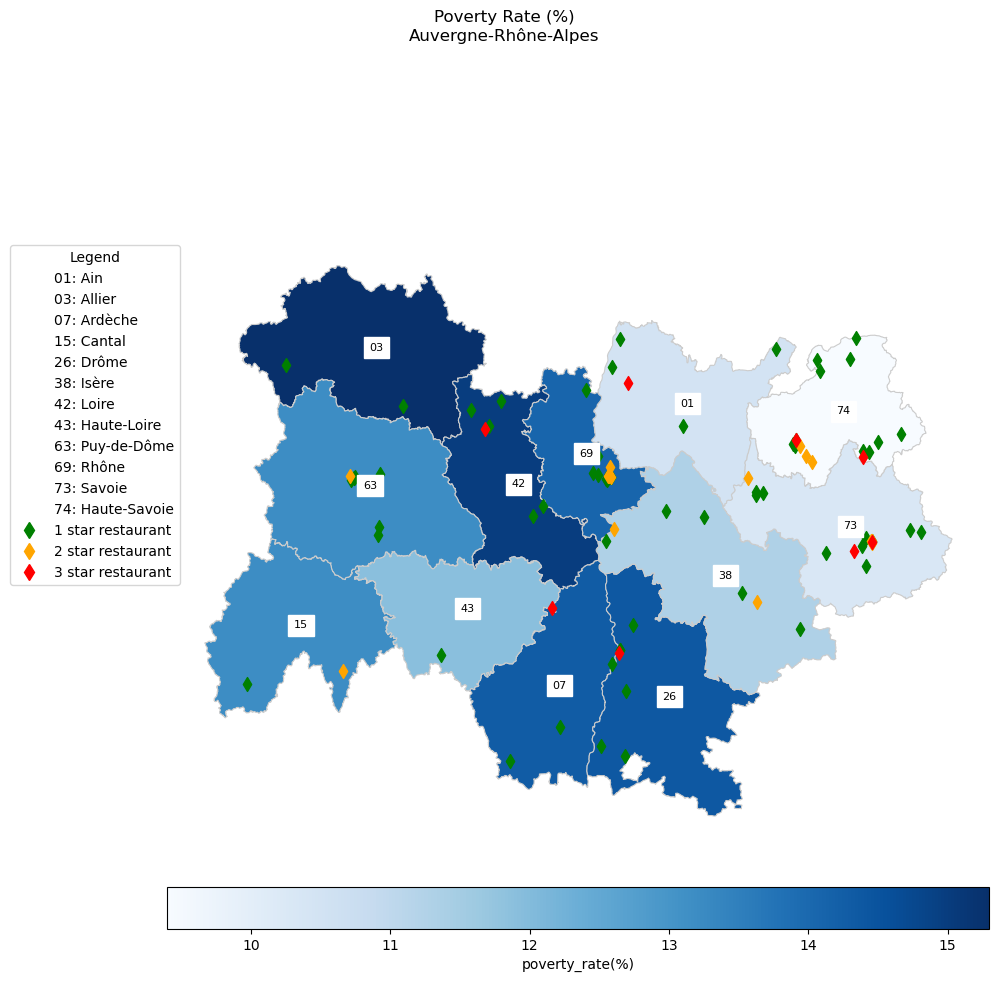

In [19]:
regions.columns.tolist()

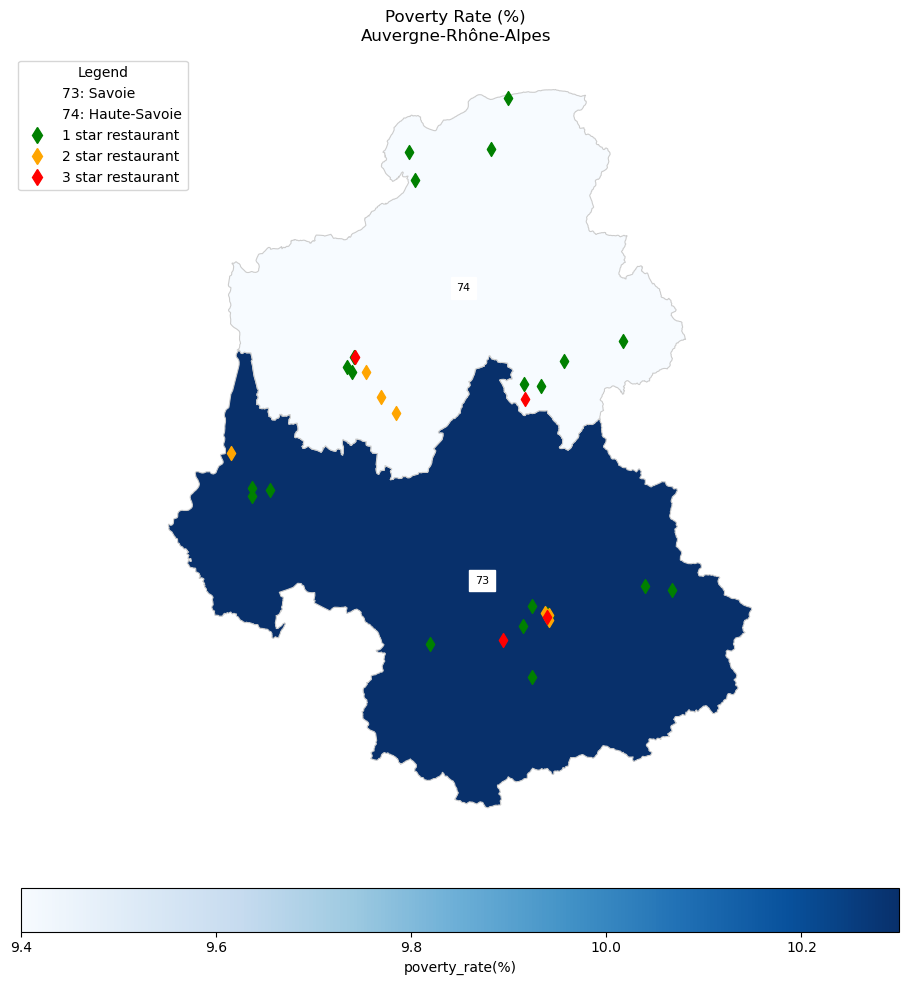

In [20]:
plot_multi_choropleth(regions, ['municipal_population', 'population_density(inhabitants/sq_km)'],
                ['Population', 'Population Density'])

#### Rest of France - (Excludes Paris)

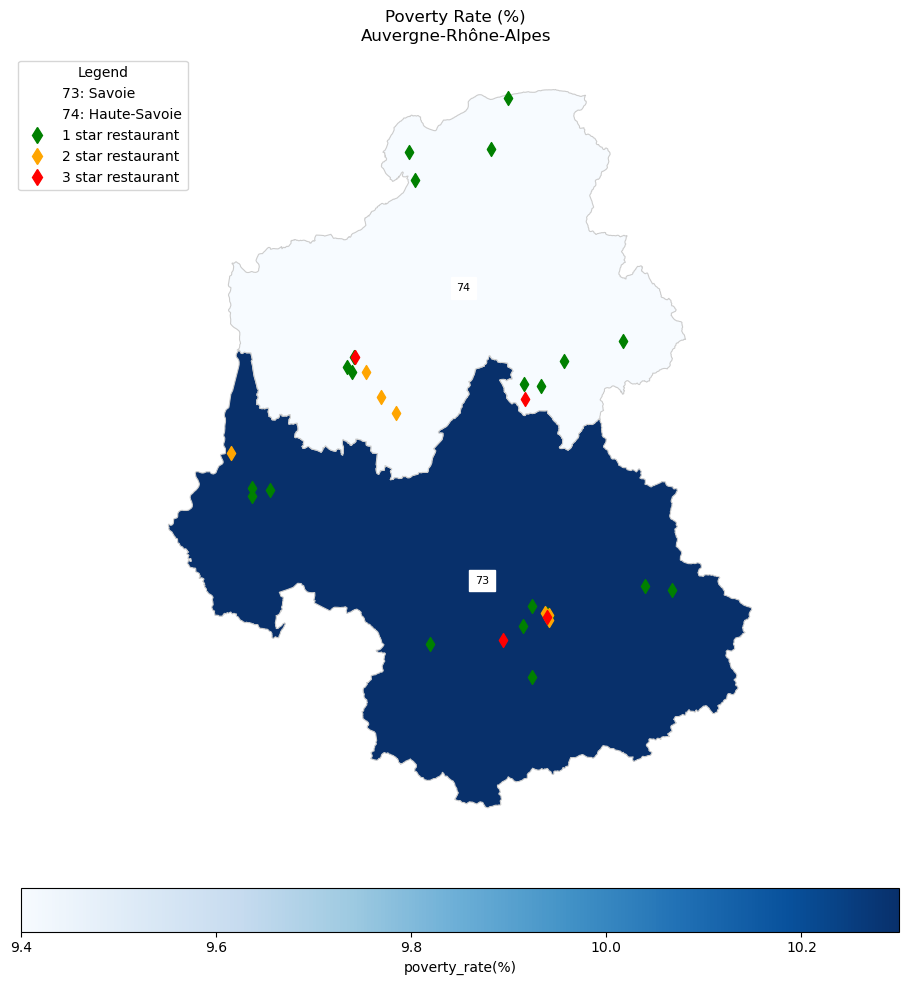

In [21]:
plot_multi_choropleth(no_paris_dept, ['1_star', '2_star', '3_star'],
                ['One Star', 'Two Star', 'Three Star'])

In [22]:
plot_multi_choropleth(no_ile_france, ['poverty_rate(%)', 'average_annual_unemployment_rate(%)', 'GDP_per_capita(€)'],
                ['Poverty Rate %', 'Unemployment Rate %', 'Per Capita GDP (€)'])

GeoDataFrame.
Unique Regions: 1
Unique Departments: 2
Unique Arrondissements: 7

Shape: (7, 18)


code           arrondissement department_num department   capital  \
252  73001              Albertville             73     Savoie  Chambéry   
253  73002                 Chambéry             73     Savoie  Chambéry   
254  73003  Saint-Jean-de-Maurienne             73     Savoie  Chambéry   

                   region  bib_gourmand  1_star  2_star  3_star  total_stars  \
252  Auvergne-Rhône-Alpes             3       7       3       2           19   
253  Auvergne-Rhône-Alpes             1       3       1       0            5   
254  Auvergne-Rhône-Alpes             0       1       0       0            1   

     starred_restaurants  municipal_population  \
252                   12                112234   
253                    4                284759   
254                    1                 42757   

     population_density(inhabitants/sq_km)  poverty_rate(%)  \
252                                   45.5             11.3   
253                                  179.5             10.1   
254                                   21.6              9.6   

     average_net_hourly_wage(€)  \
252                       15.10   
253                       15.91   
254                       15.13   

                                             locations  \
252  {'1': [[45.4102934, 6.6380783], [45.4315173, 6...   
253  {'1': [[45.6606861, 5.8522537], [45.6758342, 5...   
254  {'1': [[45.3664596, 6.3168158]], '2': None, '3...   

                                              geometry  
252  POLYGON ((6.51106 45.90906, 6.51618 45.90270, ...  
253  POLYGON ((5.83123 45.93846, 5.83526 45.93294, ...  
254  POLYGON ((7.11352 45.43419, 7.11435 45.43349, ...

----
&nbsp;
## Filtering by Region

### Auvergne-Rhône-Alpes

In [24]:
print(departments['region'].unique().tolist())

GeoDataFrame.
Unique Regions: 1
Unique Departments: 12

Shape: (12, 20)


code         department      capital              region  bib_gourmand  \
17   16           Charente    Angoulême  Nouvelle-Aquitaine             1   
18   17  Charente-Maritime  La Rochelle  Nouvelle-Aquitaine             6   
20   19            Corrèze        Tulle  Nouvelle-Aquitaine             4   

    1_star  2_star  3_star  total_stars  starred_restaurants  GDP_millions(€)  \
17       5       0       0            5                    5         10580.40   
18       2       1       0            4                    3         16887.80   
20       1       0       0            1                    1          6115.33   

    GDP_per_capita(€)  poverty_rate(%)  average_annual_unemployment_rate(%)  \
17           30082.05             14.6                                  6.9   
18           25755.02             12.4                                  6.9   
20           25566.83             13.1                                  6.1   

    average_net_hourly_wage(€)  municipal_population  \
17                       14.19              351718.0   
18                       14.21              655709.0   
20                       13.67              239190.0   

    population_density(inhabitants/sq_km)  area(sq_km)  \
17                                   59.1      5951.24   
18                                   95.5      6866.06   
20                                   40.8      5862.50   

                                            locations  \
17  {'1': [[45.6127512, 0.1816045], [45.67357, -0....   
18  {'1': [[46.1294715, -1.0099137], [45.6858339, ...   
20  {'1': [[45.158952, 1.5308409]], '2': None, '3'...   

                                             geometry  
17  POLYGON ((-0.10294 45.96966, -0.09758 45.97113...  
18  MULTIPOLYGON (((-1.11427 45.95173, -1.11630 45...  
20  POLYGON ((1.89873 45.69828, 1.89931 45.69828, ...

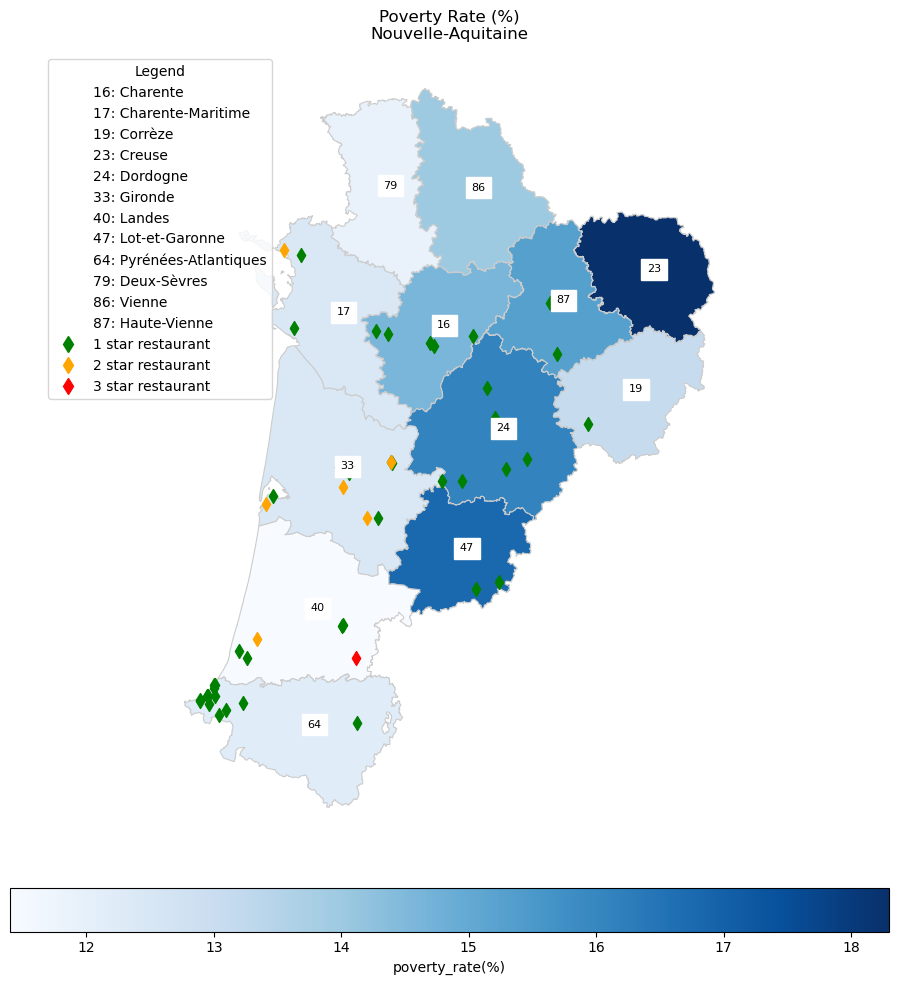

In [25]:
rhone = departments[departments['region'] == "Auvergne-Rhône-Alpes"]
savoie_dept = departments[departments['department'].isin(['Savoie', 'Haute-Savoie'])]
savoie_arron = arrondissements[arrondissements['department'].isin(['Savoie', 'Haute-Savoie'])]

In [26]:
plot_choropleth(rhone, 'total_stars', "Michelin Stars", regional=True, restaurants=True)

GeoDataFrame.
Unique Regions: 1
Unique Departments: 1
Unique Arrondissements: 6

Shape: (6, 18)


code arrondissement department_num department   capital  \
108  33001          Blaye             33    Gironde  Bordeaux   
109  33002       Bordeaux             33    Gironde  Bordeaux   
110  33003         Langon             33    Gironde  Bordeaux   

                 region  bib_gourmand  1_star  2_star  3_star  total_stars  \
108  Nouvelle-Aquitaine             1       0       0       0            0   
109  Nouvelle-Aquitaine             1      10       2       0           14   
110  Nouvelle-Aquitaine             0       1       1       0            3   

     starred_restaurants  municipal_population  \
108                    0                 93969   
109                   12                999388   
110                    2                134089   

     population_density(inhabitants/sq_km)  poverty_rate(%)  \
108                                  120.1             13.7   
109                                  656.7             12.4   
110                                   50.7             13.9   

     average_net_hourly_wage(€)  \
108                       14.27   
109                       16.71   
110                       13.99   

                                             locations  \
108                  {'1': None, '2': None, '3': None}   
109  {'1': [[44.8489572, -0.5837068], [44.8142793, ...   
110  {'1': [[44.55305, -0.24663]], '2': [[44.549381...   

                                              geometry  
108  POLYGON ((-0.75268 45.32177, -0.72330 45.32700...  
109  POLYGON ((-0.63696 45.04107, -0.62772 45.03324...  
110  POLYGON ((-0.24188 44.77857, -0.23554 44.77930...

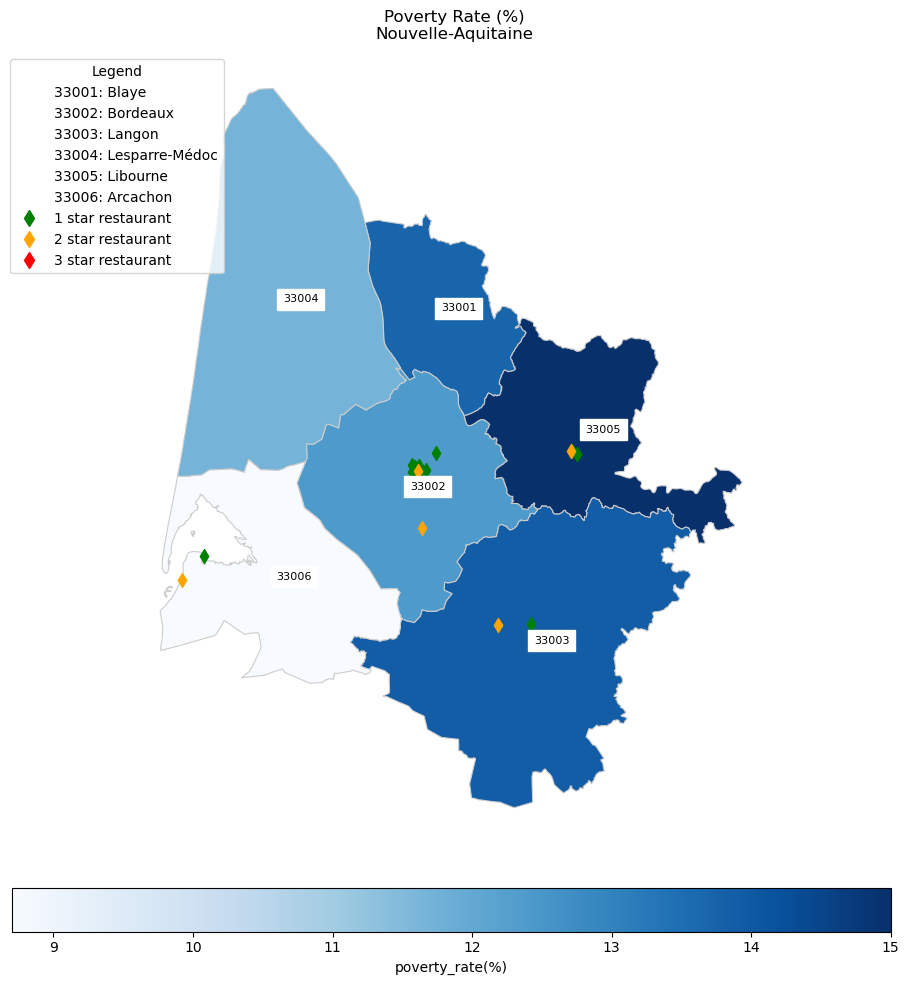

In [27]:
plot_choropleth(rhone, 'population_density(inhabitants/sq_km)', 'Population', regional=True)

#### Zoom in Savoie

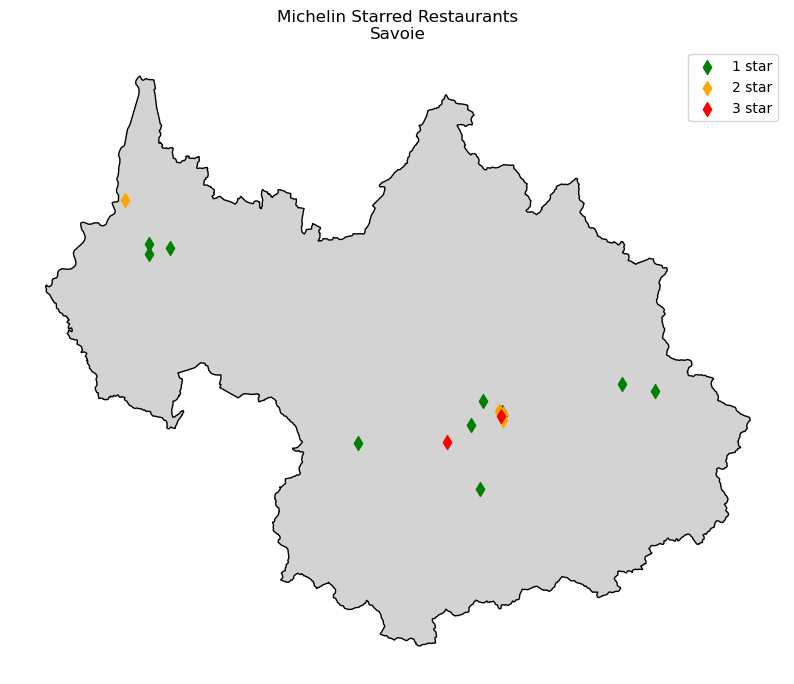

Demographics of Savoie (73):

Capital: Chambéry
Population: 439750.0
Population Density: 72.90 people/sq. km
Area: 6032.24 sq. km
Per Capita GDP: 34566.46 €
Poverty Rate: 10.3 %
Unemployment Rate: 5.3 %
Mean Hourly Wage: 15.64 €



2 ⭐⭐⭐ Restaurants:

Restaurant: René et Maxime Meilleur
Address: Hameau de  Saint-Marcel
Location: Saint-Martin-de-Belleville, 73440
Style of Cuisine: Creative, Regional Cuisine
URL: https://www.la-bouitte.com/fr/
Price: €€€€

Restaurant: Le 1947 à Cheval Blanc
Address: Le Jardin Alpin, Courchevel 1850
Location: Courchevel, 73120
Style of Cuisine: Creative
URL: https://www.chevalblanc.com/fr/maison/courchevel/
Price: €€€€


4 ⭐⭐ Restaurants:

Restaurant: Le Montgomerie
Address: Le K2 Altitude, 356 route de l'Altiport, Courchevel 1850
Location: Courchevel, 73120
Style of Cuisine: Creative
URL: https://www.lek2altitude.com/fr/deguster/montgomerie.html
Price: €€€€

Restaurant: Le Chabichou by Stéphane Buron
Address: 90 rue des Chenus, Courchevel 1850
Location: 

In [28]:
plot_choropleth(savoie_dept, 'municipal_population', "Population", regional=True, restaurants=True)

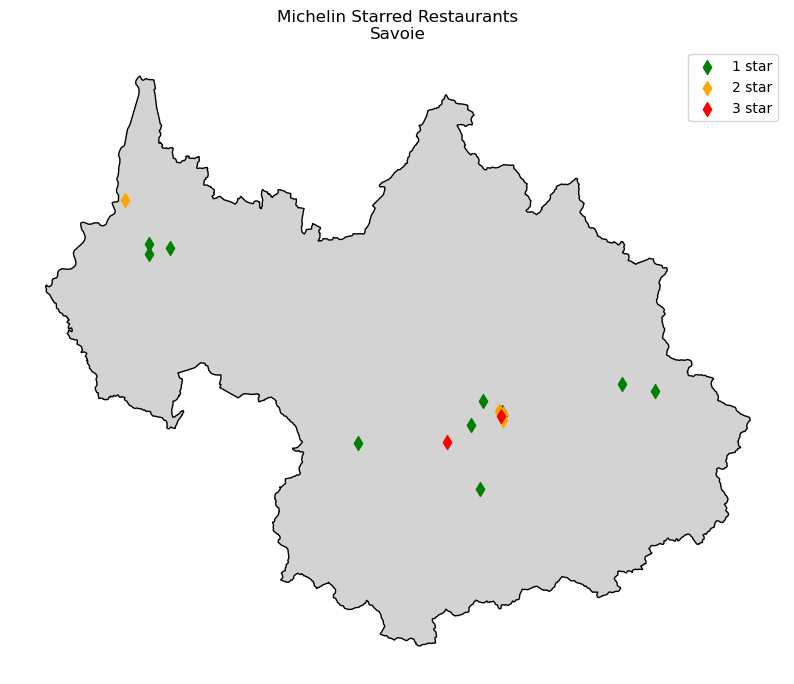

Demographics of Savoie (73):

Capital: Chambéry
Population: 439750.0
Population Density: 72.90 people/sq. km
Area: 6032.24 sq. km
Per Capita GDP: 34566.46 €
Poverty Rate: 10.3 %
Unemployment Rate: 5.3 %
Mean Hourly Wage: 15.64 €



2 ⭐⭐⭐ Restaurants:


4 ⭐⭐ Restaurants:


11 ⭐ Restaurants:




In [29]:
plot_choropleth(savoie_dept, 'poverty_rate(%)', "Poverty Rate (%)", regional=True, restaurants=True)

# TODO: Write new choropleth function for *arrondissements*

In [71]:
savoie_arron.head()

code           arrondissement department_num    department   capital  \
252  73001              Albertville             73        Savoie  Chambéry   
253  73002                 Chambéry             73        Savoie  Chambéry   
254  73003  Saint-Jean-de-Maurienne             73        Savoie  Chambéry   
255  74001                   Annecy             74  Haute-Savoie    Annecy   
256  74002               Bonneville             74  Haute-Savoie    Annecy   

                   region  bib_gourmand  1_star  2_star  3_star  total_stars  \
252  Auvergne-Rhône-Alpes             3       7       3       2           19   
253  Auvergne-Rhône-Alpes             1       3       1       0            5   
254  Auvergne-Rhône-Alpes             0       1       0       0            1   
255  Auvergne-Rhône-Alpes             6       3       3       1           12   
256  Auvergne-Rhône-Alpes             3       4       0       1            7   

     starred_restaurants  municipal_population  \
252                   12                112234   
253                    4                284759   
254                    1                 42757   
255                    7                294289   
256                    5                191104   

     population_density(inhabitants/sq_km) poverty_rate(%)  \
252                                   45.5            11.3   
253                                  179.5            10.1   
254                                   21.6             9.6   
255                                  233.3             7.9   
256                                  122.6             9.6   

    average_net_hourly_wage(€)  \
252                       15.1   
253                      15.91   
254                      15.13   
255                      16.59   
256                      15.41   

                                             locations  \
252  {'1': [[45.4102934, 6.6380783], [45.4315173, 6...   
253  {'1': [[45.6606861, 5.8522537], [45.6758342, 5...   
254  {'1': [[45.3664596, 6.3168158]], '2': None, '3...   
255  {'1': [[45.8899488, 6.1356717], [45.89973, 6.1...   
256  {'1': [[45.8471172, 6.6469716], [45.891935, 6....   

                                              geometry  
252  POLYGON ((6.51106 45.90906, 6.51618 45.90270, ...  
253  POLYGON ((5.83123 45.93846, 5.83526 45.93294, ...  
254  POLYGON ((7.11352 45.43419, 7.11435 45.43349, ...  
255  POLYGON ((6.51106 45.90906, 6.50909 45.90863, ...  
256  POLYGON ((6.37665 46.17891, 6.38182 46.17779, ...

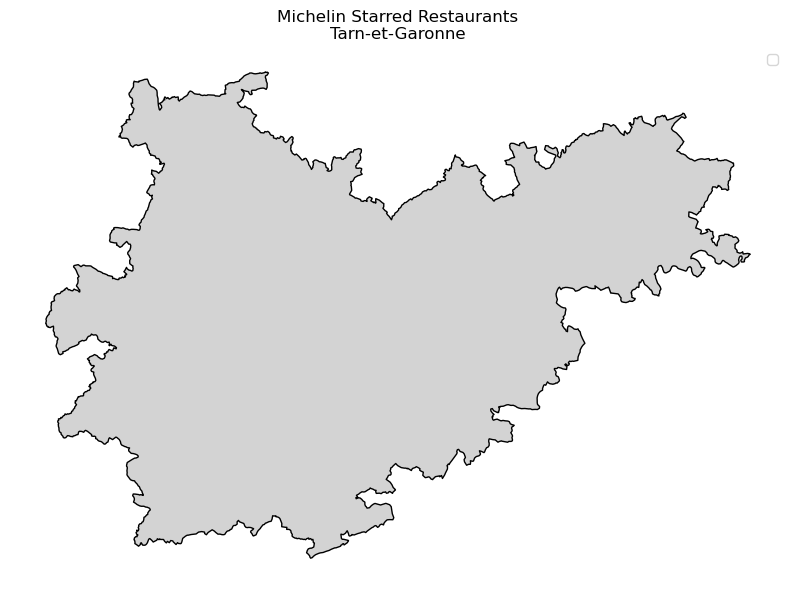

Demographics of Tarn-et-Garonne (82):

Capital: Montauban
Population: 262316.0
Population Density: 70.50 people/sq. km
Area: 3720.79 sq. km
Per Capita GDP: 23027.38 €
Poverty Rate: 16.3 %
Unemployment Rate: 8.6 %
Mean Hourly Wage: 13.97 €





----
### Nouvelle-Aquitaine

In [34]:
aquitaine = departments[departments['region'] == "Nouvelle-Aquitaine"]

In [35]:
plot_choropleth(aquitaine, 'total_stars', "Michelin Stars", regional=True, restaurants=True)

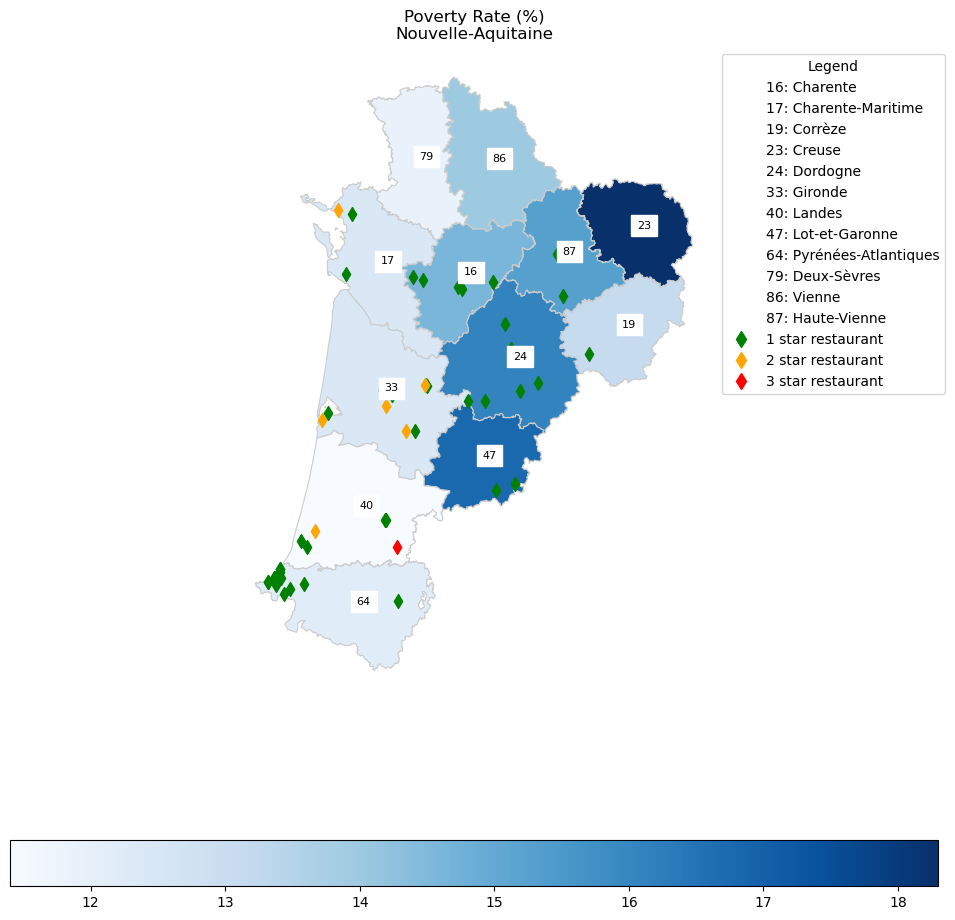

In [27]:
plot_choropleth(aquitaine, 'poverty_rate(%)', "Poverty Rate (%)", regional=True, restaurants=True)

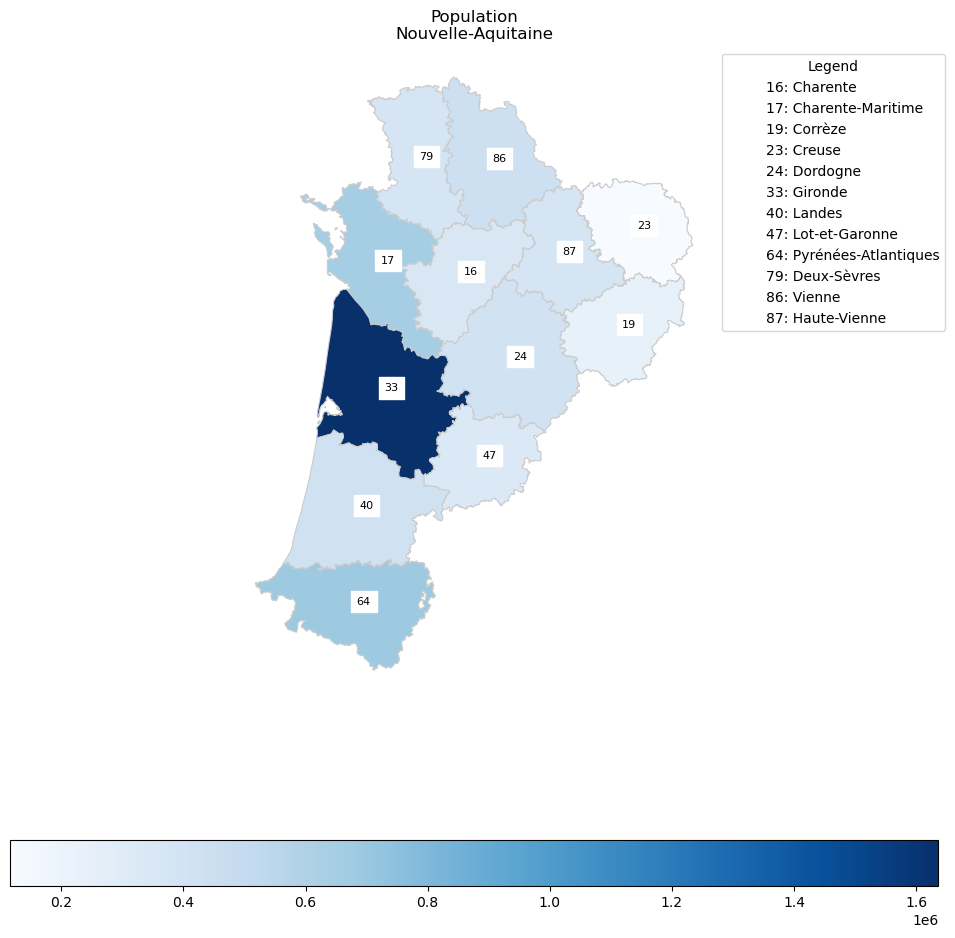

In [28]:
plot_choropleth(aquitaine, 'municipal_population', "Population", regional=True)

----
&nbsp;
### `plot_department` function

Arguments:

- `data_geo` (GeoDataFrame): GeoDataFrame containing the departmental boundaries and other geospatial data.
- `data` (DataFrame): DataFrame containing restaurant details.
- `department_code` (str): The department code to focus on.
- `display_restaurants` (bool): Whether to display individual restaurants. Default is True.
- `display_info` (bool): Whether to print additional restaurant information. Default is False.

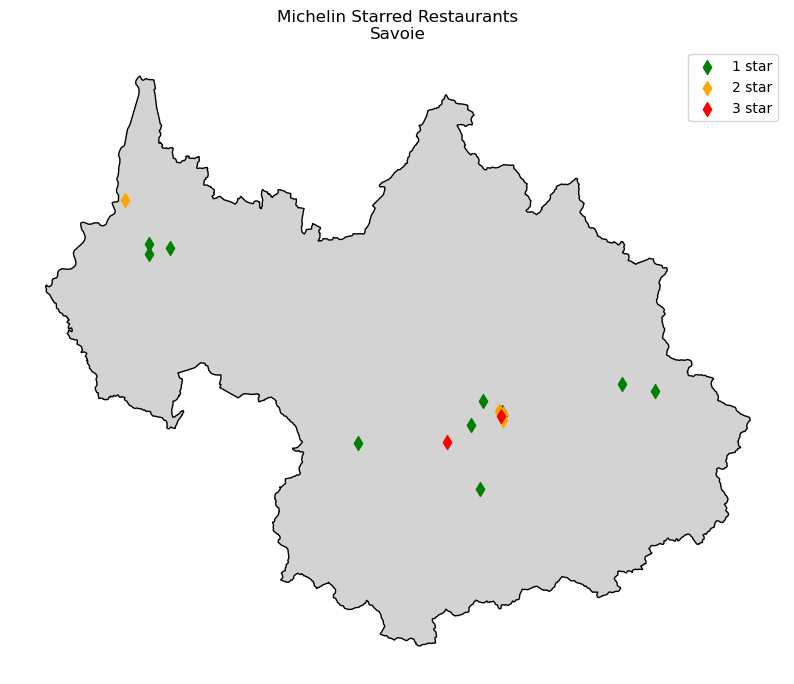

Demographics of Savoie (73):

Capital: Chambéry
Population: 439750.0
Population Density: 72.90 people/sq. km
Area: 6032.24 sq. km
Per Capita GDP: 34566.46 €
Poverty Rate: 10.3 %
Unemployment Rate: 5.3 %
Mean Hourly Wage: 15.64 €



2 ⭐⭐⭐ Restaurants:

Restaurant: René et Maxime Meilleur
Address: Hameau de  Saint-Marcel
Location: Saint-Martin-de-Belleville, 73440
Style of Cuisine: Creative, Regional Cuisine
URL: https://www.la-bouitte.com/fr/
Price: €€€€

Restaurant: Le 1947 à Cheval Blanc
Address: Le Jardin Alpin, Courchevel 1850
Location: Courchevel, 73120
Style of Cuisine: Creative
URL: https://www.chevalblanc.com/fr/maison/courchevel/
Price: €€€€


4 ⭐⭐ Restaurants:

Restaurant: Le Montgomerie
Address: Le K2 Altitude, 356 route de l'Altiport, Courchevel 1850
Location: Courchevel, 73120
Style of Cuisine: Creative
URL: https://www.lek2altitude.com/fr/deguster/montgomerie.html
Price: €€€€

Restaurant: Le Chabichou by Stéphane Buron
Address: 90 rue des Chenus, Courchevel 1850
Location: 

In [29]:
plot_department(departments, all_france, '73', display_info=True)

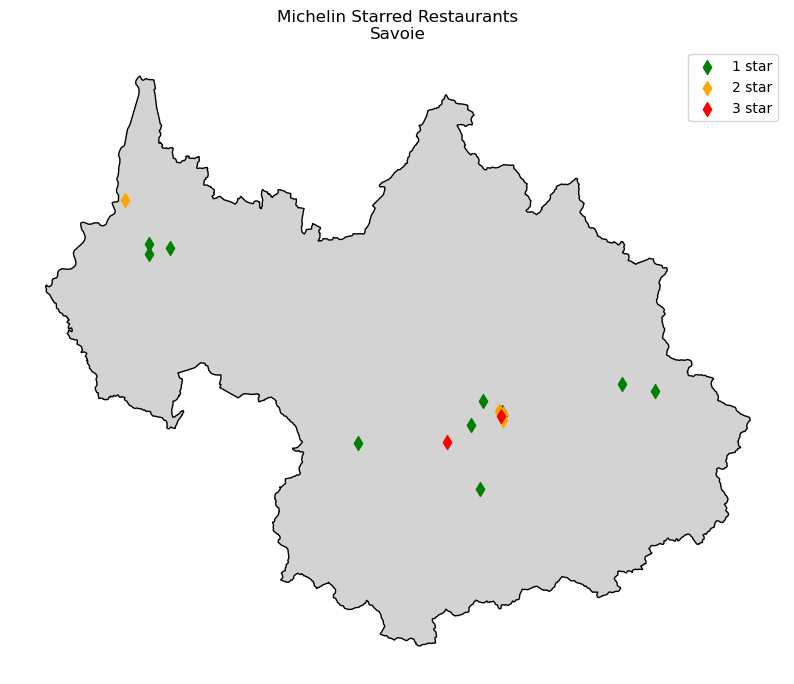

Demographics of Savoie (73):

Capital: Chambéry
Population: 439750.0
Population Density: 72.90 people/sq. km
Area: 6032.24 sq. km
Per Capita GDP: 34566.46 €
Poverty Rate: 10.3 %
Unemployment Rate: 5.3 %
Mean Hourly Wage: 15.64 €



2 ⭐⭐⭐ Restaurants:


4 ⭐⭐ Restaurants:


11 ⭐ Restaurants:




In [30]:
plot_department(departments, all_france, '73', display_info=False)

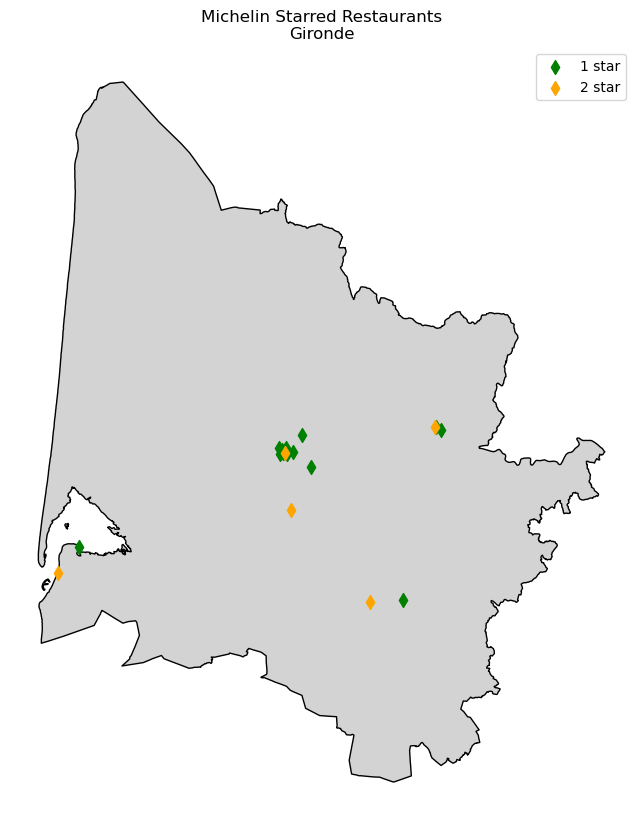

Demographics of Gironde (33):

Capital: Bordeaux
Population: 1636391.0
Population Density: 164.00 people/sq. km
Area: 9977.99 sq. km
Per Capita GDP: 34152.66 €
Poverty Rate: 12.4 %
Unemployment Rate: 6.5 %
Mean Hourly Wage: 16.01 €



5 ⭐⭐ Restaurants:

Restaurant: La Table de Pavie
Address: 5 place du Clocher
Location: Saint-Emilion, 33330
Style of Cuisine: Modern Cuisine, Creative
URL: http://www.hoteldepavie.com
Price: €€€€

Restaurant: Le Pressoir d'Argent - Gordon Ramsay
Address: Le Grand Hôtel, 2 place de la Comédie
Location: Bordeaux, 33000
Style of Cuisine: Modern Cuisine
URL: https://www.bordeaux.intercontinental.com/
Price: €€€€

Restaurant: La Grand'Vigne - Les Sources de Caudalie
Address: Chemin de Smith-Haut-Lafitte
Location: Martillac, 33650
Style of Cuisine: Modern Cuisine
URL: https://www.sources-caudalie.com/
Price: €€€€

Restaurant: Le Skiff Club
Address: 1 avenue Louis-Gaume
Location: Pyla-sur-Mer, 33115
Style of Cuisine: Modern Cuisine
URL: http://www.haaitza.com
Pr

In [31]:
plot_department(departments, all_france, '33', display_info=True)

The function also handles departments with zero starred restaurants

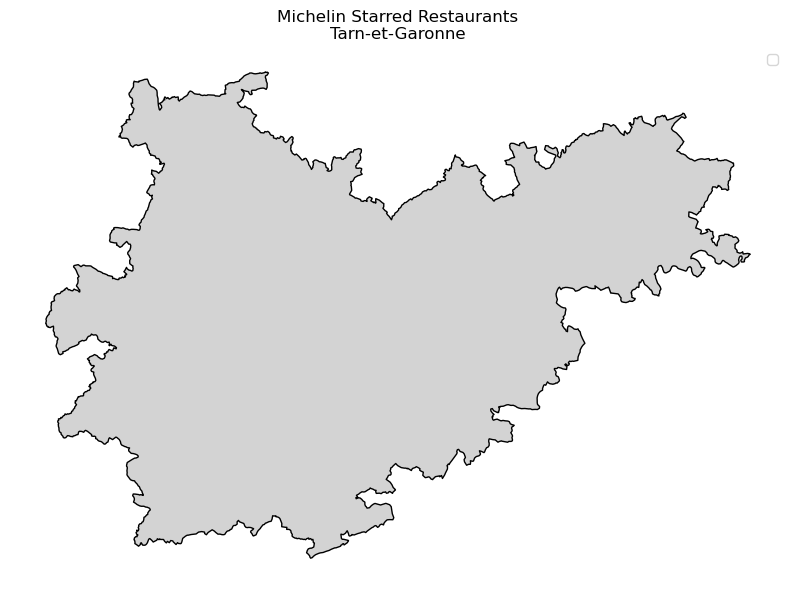

Demographics of Tarn-et-Garonne (82):

Capital: Montauban
Population: 262316.0
Population Density: 70.50 people/sq. km
Area: 3720.79 sq. km
Per Capita GDP: 23027.38 €
Poverty Rate: 16.3 %
Unemployment Rate: 8.6 %
Mean Hourly Wage: 13.97 €





In [32]:
plot_department(departments, all_france, '82', display_info=True)

----
&nbsp;
### `plot_interactive_department` function

Visualizes restaurants in a specified department on an interactive map, showing each restaurant as a marker colored by its star rating and providing detailed hover information including a clickable URL.

The underlying departmental boundary is also displayed using a choropleth map.

In [33]:
from plotly_visual import plot_interactive_department

In [34]:
plot_interactive_department(all_france, departments, '73')

As Interactive plot with not render on GitHub, below is a screenshot of functionality

![img](../../Images/interactive_dept.png)

----